# Perceptron Learning Algorithm

Cứ làm đi, sai đâu sửa đấy, cuối cùng sẽ thành công!

Đó chính là ý tưởng chính của một thuật toán rất quan trọng trong Machine Learning - thuật toán Perceptron Learning Algorithm hay PLA.

## Giới thiệu

Perceptron là một thuật toán Classification cho trường hợp đơn giản nhất chỉ có hai class (lớp), hay còn được gọi là binary classification

Tuy nhiên, nó là nền tảng cho một mảng lớn quan trọng của Machine Learning là Neural Networks và sau này là Deep Learning.


## Đặt vấn đề

Giả sử chúng ta có tập dữ liệu đã được gán nhãn là các điểm màu xanh và màu đỏ. 
 
Bài toán đặt ra là: Hãy xây dựng một classifier (bộ phân loại) để khi có một điểm dữ liệu hình tam giác màu xám mới, ta có thể dự đoán được màu (nhãn) của nó.

<img src="https://machinelearningcoban.com/assets/pla/pla1.png" style="heigh:400px; width:400px; position:relative; margin-top:50px; left: 180px; margin-bottom:50px">


Hiểu theo một cách khác, chúng ta cần tìm lãnh thổ của mỗi class sao cho, với mỗi một điểm mới, ta chỉ cần xác định xem nó nằm vào lãnh thổ của class nào thì nó thuộc class đó. Để tìm lãnh thổ của mỗi class, chúng ta cần đi tìm biên giới (boundary) giữa hai lãnh thổ này. Vậy bài toán classification có thể coi là bài toán đi tìm boundary giữa các class. 

Và boundary đơn giản nhất trong không gian hai chiều là một đường thằng

Hình dưới minh họa một đường thẳng phân chia hai class trong mặt phẳng. Phần có nền màu xanh được coi là lãnh thổ của lớp xanh, phần có nên màu đỏ được coi là lãnh thổ của lớp đỏ. Trong trường hợp này, điểm dữ liệu mới hình tam giác được phân vào class đỏ.



<img src="https://machinelearningcoban.com/assets/pla/pla2.png" style="heigh:400px; width:400px; position:relative; margin-top:50px; left: 180px; margin-bottom:50px">

## Bài toán Perceptron

Bài toán Perceptron được phát biểu như sau: Cho hai class được gán nhãn, hãy tìm một đường phẳng sao cho toàn bộ các điểm thuộc class 1 nằm về 1 phía, toàn bộ các điểm thuộc class 2 nằm về phía còn lại của đường phẳng đó. 

Nếu tồn tại một đường phẳng phân chia hai class thì ta gọi hai class đó là linearly separable.

##  Thuật toán Perceptron (PLA)

Thuật toán PLA là một dạng thuật phân loại đặc biệt, nó sử dụng các kỹ thuật của Gradient Descent và Linear regression. Ý tưởng cơ bản của PLA là xây dựng một hàm mất mát dựa trên một hàm tuyến tính cho trước, sau đó tiến hành tối thiểu hàm mất mát bằng cách lặp lại liên tục việc cập nhật trọng số tới một ví trí tốt hơn. 

Việc xây dựng hàm mất mát của PLA phải thỏa mãn hàm số phải khả vi (nhằm mục đích có thể tính được đạo hàm bậc nhất) và từ đó sử dụng gradient descent để tìm nghiệm global minimum.


Nghe qua thì ta thấy thuật toán này có vẻ giống linear regression vì có nhiều công thức toán học, ta sẽ nhầm tưởng nó chỉ áp dụng cho bài toán regression. Nhưng không, thực chất là nó áp dụng cho bài toán classification. Tại sao lại mâu thuẫn như vậy? Lát nữa tôi sẽ giải thích. 

## Phân tích toán học

Dữ liệu của bài toán luôn được cho dưới dạng một bảng có N hàng và d+1 cột. 

Tại sao lại là d+1 cột mà không phải d cột ? Theo nguyên tắc phân chia dữ liệu trong học máy thì chúng ta sẽ lấy cột một cột đại diện cho đầu ra mà ta muốn dự đoán (ta gọi nó là vector phản hồi) và các cột còn lại được gom thành một ma trận đặc trưng. Khi thực hiện điều này, ma trận đặc trưng sẽ có kích thước $N×d$ và vector phản hồi sẽ có kích thước là $N×1$. Chúng ta luôn muốn đảm bảo rằng luôn có một cột được chừa lại nên đây là lý do tại sao lại có d + 1 cọt

Xét ma trận đặc trưng $X=(x_1,x_2,…,x_d) ∈R^{N×d}$ chứa các đặc trưng (cột) $x_i$. Mỗi một đặc trưng này chứa các điểm dữ liệu.

Tập dữ liệu đầu ra $y=(y_1,y_2,…,y_N)$ được gọi là vector phản hồi

**Xây dựng hàm tuyến tính**

Giống như Hồi quy tuyến tính, giả sử tồn tại một linearly separable là một đường thẳng có phương trình:

$$z =w_1x_1+⋯+w_dx_d+w_0=w^Tx =0   \quad(1)$$ 



Lưu ý, chúng ta mở rộng $x$ bằng cách thêm phần tử $x_0=1$ lên trước các điểm $x_1,x_2,...,x_d $ tương tự như trong Linear Regression. Điều này lý giải tại sao phương trình (1) xuất hiện $w_0$ đóng vai trò như một bias. 

Để cho đơn giản, chúng ta hãy cùng làm việc với trường hợp mỗi điểm dữ liệu có số chiều d+1=2. 

Phường trình đường thẳng lúc này có thể là $z= w_1x_1+w_2x_2+w_0=0$. 

Nghiệm của nó được biểu diễn bằng đồ thị đưới đây:

<img src="https://machinelearningcoban.com/assets/pla/pla4.png" style="position: relative; margin-top: 20px; heigh:450px;width:450px; margin-bottom:20px; left:350px">


Nhận xét rằng đường thẳng của phương trình (1) chia mặt phẳng thành 2 nửa, nửa nền xanh mang dấu dương (+) và nửa nền đỏ mang dấu âm (-). Điều đó cũng có nghĩa là $z ≥0$ nếu $(x_1, x_2)$ nằm ở nền xanh, và $z < 0$ nếu $(x_1, x_2)$ nằm nền đỏ.

Mặt khác, vì bài toán mang tính chất binary classification nên các đầu ra $y_i$ sẽ luôn tuân theo quy tắc:
- $y_i=1$  nếu vector $(x_{1}, x_{2})$  thuộc class 1 (xanh) 
- $y_i=−1$ nếu vector $(x_{1}, x_{2})$  thuộc class 2 (đỏ).

Vậy thì lúc này, ta có thể cho rằng dấu (+) có thể đại diện cho trường hợp $y_i=1$ và dấu (-) đại diện cho trường hợp $y_i=-1$. 

Như vậy, ta có quy luật xác định đầu ra dự đoán là :
$$label(x_1, x_2) = 1 \quad \text{if} \quad z ≥0 \quad ,otherwise−1$$

Từ quy luật trên, ta có thể thiết lập một hàm số xác định dấu dựa trên $z$ :

$$\text{sign}(z) = \begin{cases}
1 & \text{nếu } z ≥ 0\\
-1 & \text{nếu } z < 0
\end{cases}$$

Đây chính là lý do ở đầu bài viết tôi có nói rằng PLA mặc dù có cái gì đó "giống" regression nhưng thực chất là nó áp dụng cho bài toán classification. Vì sự hiện diện của hàm sign nên đầu ra mà chúng ta dự đoán chỉ có -1 hoặc 1 thôi, chúng không phải giá trị thực và không hề liên tục trên bất kỳ điểm nào.

Hàm sign này còn được gọi là một hàm kích hoạt (activation function). Thuật ngữ "activation" thường được đề cập trong mô hình neuron network. Và tôi cũng đã nói rồi, PLA chính là nền tảng cho Neural Networks và Deep Learning nên sau này nếu các bạn có áp dụng PLA để nghiên cứu về nn thì hãy nghĩ ngay: activation function chính là sign.

**Xây dựng hàm mất mát - loss function**

Trong thuật toán PLA, sự mất mát không nằm ở chênh lệch giữa giá trị thực tế và giá trị dự đoán vì đây vẫn là bài toán classification, nó thể hiện ở hiện tượng misclassified (phân lớp lỗi). Tức là các điểm dữ liệu bị đặt sai chỗ trong 2 nửa mặt phẳng. Do đó, hàm mất mát đơn giản nhất chúng ta nghĩ đến là hàm đếm số lượng các điểm bị misclassied:


<img src="https://machinelearningcoban.com/assets/pla/pla3.png" style="position: relative; margin-top: 20px; heigh:450px;width:450px; margin-bottom:20px; left:350px">


Gọi $M$  là tập hợp các điểm bị misclassifed (tập hợp này thay đổi theo w).

Với một điểm $x∈M$ bị misclassified, nhãn thực tế $y$ và nhãn dự đoán $sign(z)$ của nó sẽ nằm ở 2 mặt phẳng khác nhau. Điều đó có nghĩa là chúng sẽ trái dấu nhau. Hay nói cách khác thì $y × sign(z)=−1$

Vậy thì, nếu xét toàn bộ trên tập M, chúng ta sẽ phải đếm số lượng các điểm bị misclassied như vậy bằng phương trình sau: $$J(w)=∑_{x_i∈M}−y_i sign(w^Tx)$$

*Mặc dù ở trên phương trình (1) có ghi $z = w^Tx$, tôi vẫn để là $sign(w^Tx)$ thay vì $sign(z)$ vì muốn thể hiện rằng $j(w)$ chỉ phụ thuộc vào $w$ mà không phụ thuộc vào toàn bộ $z$*

Chúng ta phải đổi dấu của $y_i.sign(w^Tx_i)$ là để hàm $J(w)$ đạt giá trị nhỏ nhất khi số điểm bị phân loại nhầm là nhỏ nhất

Tuy nhiên ta nhận thấy rằng xét trên tập  M thì hàm $J(w)$ không liên tục mà nó rời rạc, không tính được đạo hàm theo $w$ nên rất khó tối ưu. Chúng ta cần tìm một hàm mất mát khác để việc tối ưu khả thi hơn. Ta tạm gọi hàm mới này là $J_1(w)$

$$J_1(w)=∑_{x_i∈M}−y_i(w^Tx_i)$$

Công thức này đã lược bỏ đi hàm $sign()$ khiến nó khả vi ở mọi điểm (tức là liên tục tại mọi điểm và điều này là cơ sở để tính đạo hàm cho bước tiếp theo - áp dụng gradient descent). 

Nếu chịu khó thử nghiệm, ta sẽ thấy rằng khi một điểm misclassified $x_i$ nằm càng xa đường linearly separable thì giá trị $−y_i(w^Tx_i)$ sẽ càng âm, nghĩa là sự sai lệch càng lớn. Điều này khiến nó tốt hơn so với hàm $J()$ vì nó trừng phạt rất nặng những điểm lấn sâu sang lãnh thổ của class kia, trong khi $J()$ sẽ đánh đồng tất cả các điểm bị phân loại nhầm bằng -1. 

Đến đây, tôi xin chính thức gọi $J_1(w)$ là hàm $J(w)$ và đây chính là loss function của PLA. Ta sẽ sang bước tiếp theo: tối thiểu loss function bằng thuật toán gradient descent.

**Áp dụng gradient descent để lặp lại việc cập nhật trọng số**

Nếu như tìm hiểu gradient descent rồi, ta sẽ thấy rằng khi tính đạo hàm riêng cho loss function theo từng tham số $w_i$ (trừ tham số $w_0$) thì kết quả tương ứng sẽ có dạng $x_i(\hat{y}​ −y)$. Tức là, giá trị $x_i$ luôn xuất hiện trong kết quả đó. 

Vậy thì, trong bài toán này, điều tương tự cũng xảy ra khi ta tiến hành đạo hàm loss function:
$$∇_wJ(w;x_i;y_i)=−y_ix_i$$

*Ghi chú: Ký hiệu trên có nghĩa là đạo hàm của $J(w)$  theo $w$ tại một điểm dữ liệu $(xi, yi)$ nào đó. Mặc dù chúng ta hiểu rằng $w$ không phải biến mà là một vector nên muốn tính $∇_w$ thì ứng với từng $w_i$, ta phải tính từng $∇_{w_i}$, nhưng ta nhận thấy rằng dù tính theo $w_i$ nào thì kết quả đều như nhau. Do đó, ta hoàn toàn có thể viết là $∇_w$ mà không có vấn đề gì.*

Áp dụng gradient descent, chúng ta có quy tắc cập nhật trọng số: 

$$w_{t+1}=w_t-η∇_wJ(w;x_i;y_i)$$
$$⇔ w_{t+1}=w_t+η(y_ix_i)$$

Với η (eta) là learning rate được chọn bằng 1, ta có một quy tắc cập nhật rất gọn như sau: $$w_{t+1}=w_t+y_ix_i \quad (2)$$. 

Nói cách khác, với mỗi điểm $x_i$ bị misclassifed, ta chỉ cần nhân điểm đó với nhãn $y_i$ của nó, lấy kết quả cộng vào $w$ ta sẽ được $w$ mới. 


**Kiểm tra nghiệm**

Nhắc lại, mục đích tối thượng của bài toán là đi tìm nghiệm $w$ sao cho các điểm được classifed đúng. Ở công thức $(2)$, ta đã chạy vòng lặp để cập nhật nghiệm $w_t$ bằng gradient descent để cho ra một nghiệm mới là $w_{t+1}$. 

#########

Ta có một quan sát nhỏ: $$w_{t+1}^T x_i = (w_{t} + y_i x_i)^T x_{i} = w_{t}^T x_i + y_i||x_i||_2^2$$

Mặc dù không có hàm sign, tích vô hướng của vector trọng số $w$ và điểm dữ liệu $x_i$ vẫn cho biết mức độ "gần gũi" của điểm đó với đường phân tách (boundary). Nếu tích này dương, điểm dữ liệu nằm ở phía bên phải của đường phân tách (thuộc lớp 1), và ngược lại nếu nó âm thì điểm dữ liệu nằm ở phía bên trái (thuộc lớp -1).

Điều đó cũng có nghĩa là, nếu tích này càng lớn thì điểm đó sẽ càng lấn sâu vào lãnh thổ được phân loại chính xác.

Khi $x_i$ bị misclassifed ở thời điểm t, nếu $y_i = 1$ thì xảy ra 2 hệ quả sau:
- $w_{t}^T x_i <0$ (Vì đây là nhãn dự đoán, nó nằm khác mặt phẳng so với $y_i$)
- $y_i||x_i||^2_2=||x_i||^2_2≥1 \quad$  (mặc định bias $x_0=1$ nên giá trị nhỏ nhất của $||x_i||^2_2$ sẽ là 1 nếu các phần tử còn lại trong $X$ bằng 0).  

Hai hệ quả trên dẫn tới sự kiện $w_{t}^T x_i + y_i||x_i||_2^2>w^T_{t}x_i \quad$  (một số âm cộng với số dương nào đó luôn lớn hơn chính nó)

Hay nói cách khác là $$w^T_{t+1}x_i>w^T_{t}x_i$$

Điều này có nghĩa là, tích vô hướng $w_{t+1}^T$ luôn tăng lên sau mỗi lần cập nhật ở thời điểm t. Chắc chắn là nó sẽ tăng lên một mức nào đó lớn hơn 0 và khi đó nó sẽ tiến về phía làm cho $x_i$ được phân lớp đúng. Điều tương tự xảy ra nếu  $y_i=−1$

Quay trở lại với câu hỏi vừa rồi, khi nào thì dừng lặp ?

Câu trả lời chính là: Khi không còn điểm nào bị misclassified nữa. Thời điểm đó cũng lầ lúc giá trị $w_{t+1}^T$ đạt tới hạn.

Đến đây, cảm nhận của chúng ta với thuật toán này là: cứ chọn đường boundary đi. Xét từng điểm một, nếu điểm đó bị misclassified thì tiến đường boundary về phía làm cho điểm đó được classifed đúng. Có thể thấy rằng, khi di chuyển đường boundary này, các điểm trước đó được classified đúng có thể lại bị misclassified. Mặc dù vậy, PLA vẫn được đảm bảo sẽ hội tụ sau một số hữu hạn bước (tôi sẽ chứng minh việc này ở phía sau của bài viết). Tức là cuối cùng, ta sẽ tìm được đường phẳng phân chia hai lớp, miễn là hai lớp đó là linearly separable. Đây cũng chính là lý do câu đầu tiên trong bài này tôi nói với các bạn là: “Cứ làm đi, sai đâu sửa đấy, cuối cùng sẽ thành công!”.

## Nhược điểm của thuật toán
Một nhược điểm của Perceptron là nó chỉ hoạt động thực sự tốt khi dữ liệu phân tách tuyến tính (linearly separable), tức có thể dùng đường thẳng, mặt phẳng, siêu phẳng để làm biên giới, nếu dữ liệu không thỏa điều kiện này, không những Perceptron mà bất kì thuật toán phân loại tuyến tính nào cũng sẽ fail "nhè nhẹ".

## tóm tắt thuật toán PLA

1. Khởi tạo trọng số: Khởi tạo vector trọng số $w = (0,0,...0)$ và bias $w_0 = 0$.
2. Duyệt ngẫu nhiên qua từng điểm dữ liệu $x_i$:
   - Nếu $x_i$ được phân lớp đúng, tức $sign(w^Tx_i)=y_i$, chúng ta không cần làm gì.
   - Nếu $x_i$ bị misclassifed, cập nhật w theo công thức:$$w=w+y_ix_i$$
3. Kiểm tra xem có bao nhiêu điểm bị misclassifed. Nếu không còn điểm nào, dừng thuật toán. Nếu còn, quay lại bước 2.

## Triển khai

### Cách thủ công

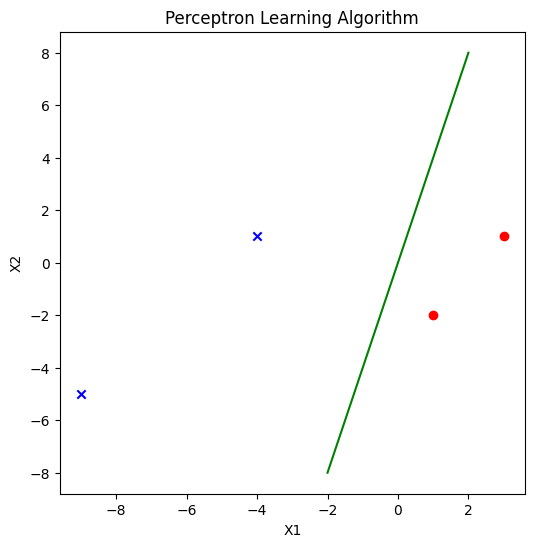

In [170]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu huấn luyện
X = np.array([[3,  1 ], 
              [1, -2 ], 
              [-4, 1 ], 
              [-9, -5]])
y = np.array([1, 1, -1, -1])

# sign
def sign(z):
    return 1 if z >=0 else -1

# gradient-descent
def GD(x, y, w, b):
    z = np.dot(w, x) + b
    if sign(z) != y:
        w = w + y * x
        b = b + y
    return w, b

# PLA
def PLA(X, y, max_epochs=100):
    w = np.zeros(X.shape[1]) # init w1 = w2 = 0
    b = 1 # init bias  b = 1
    for epoch in range(max_epochs):
        misclassified = False
        
        for x_i, y_i in zip(X, y):
            
            # update weight
            w, b = GD(x_i, y_i, w, b)
            
            # check weight
            z = np.dot(w, x_i) + b
            if sign(z) != y_i:
                misclassified = True
        
        # check weight
        if misclassified == False:
            break
    return w, b

# run PLA
w, b = PLA(X, y)

# plot graph
plt.figure(figsize=(6, 6))

# data points
for x, y in zip(X, y):
    if y == 1:
        plt.scatter(x[0], x[1], color='r', marker='o')
    else:
        plt.scatter(x[0], x[1], color='b', marker='x')

# Vẽ đường phân cách
x1 = np.linspace(-2, 2, 100)
x2 = -(w[0] * x1 + b) / w[1]
plt.plot(x1, x2, 'g-')

# plt.xlim([-2.5, 2.5])
# plt.ylim([-2.5, 2.5])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning Algorithm')
plt.show()

### Dùng thư viện sklearn

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
#
# Import Keras modules
#
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier # neural network

In [2]:
# Load the iris dataset

iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [6]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

In [7]:
clf.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1)

In [8]:
prediction = clf.predict(X_test)
print(prediction)

[2 0 1 1 1 0 2 2 2 1 0 1 2 1 2 1 2 1 1 2 1 2 1 0 2 2 1 0 2 1]


In [9]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the Multi-layer Perceptron is: 0.7666666666666667


- [machinelearningcoban.com](https://machinelearningcoban.com/2017/01/21/perceptron/#:~:text=Thu%E1%BA%ADt%20to%C3%A1n%20Perceptron%20%28PLA%29%201%20M%E1%BB%99t%20s%E1%BB%91%20k%C3%BD,m%E1%BA%A5t%20m%C3%A1t%20...%203%20T%C3%B3m%20t%E1%BA%AFt%20PLA%20)
- [rpubs.com](https://rpubs.com/phamdinhkhanh/393922)